In [7]:
## how to save a model in ML using Picklel
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import style

In [8]:
## load the data
data_path = './data/student-por.csv'

df = pd.read_csv(data_path, sep= ';')

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Simple numerical attributes:
#### `sex` == student's sex (binary: 'F' - female or 'M' - male)
#### `age` == student's age (numeric: from 15 to 22)
#### `G1, G2, G3` == grades(marks) related to course, Math or Portuguese
#### `studytime` == weekly study time: 1-<2 hr, 2-5 hr, 3,5-10 hr, or 4->10 hr
#### `failures` == number of past class failures (numeric: n if 1<=n<3, else 4)
#### `absences` == number of school absences (numeric: from 0 to 93)

In [9]:
## numericall attributes are easy to work with
df = df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences', 'age', 'sex']]

In [10]:
df.head()

,G1,G2,G3,studytime,failures,absences,age,sex
0,0,11,11,2,0,4,18,F
1,9,11,11,2,0,2,17,F
2,12,13,12,2,0,6,15,F
3,14,14,14,3,0,0,15,F
4,11,13,13,2,0,0,16,F


In [11]:
df.dtypes

G1            int64
G2            int64
G3            int64
studytime     int64
failures      int64
absences      int64
age           int64
sex          object
dtype: object

In [12]:
## preprocess or data cleaning
df.isna()

,G1,G2,G3,studytime,failures,absences,age,sex
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False
646,False,False,False,False,False,False,False,False
647,False,False,False,False,False,False,False,False


In [13]:
df = df.copy()

In [14]:
#df['sex'].sum() ## sum cannot be done on non numericals

In [15]:
## convert binary F and M to 0 or 1
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)

In [16]:
df['sex'].sum()

np.int64(266)

In [17]:
df.head()

,G1,G2,G3,studytime,failures,absences,age,sex
0,0,11,11,2,0,4,18,0
1,9,11,11,2,0,2,17,0
2,12,13,12,2,0,6,15,0
3,14,14,14,3,0,0,15,0
4,11,13,13,2,0,0,16,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         649 non-null    int64
 1   G2         649 non-null    int64
 2   G3         649 non-null    int64
 3   studytime  649 non-null    int64
 4   failures   649 non-null    int64
 5   absences   649 non-null    int64
 6   age        649 non-null    int64
 7   sex        649 non-null    int64
dtypes: int64(8)
memory usage: 40.7 KB


In [19]:
print(df)

     G1  G2  G3  studytime  failures  absences  age  sex
0     0  11  11          2         0         4   18    0
1     9  11  11          2         0         2   17    0
2    12  13  12          2         0         6   15    0
3    14  14  14          3         0         0   15    0
4    11  13  13          2         0         0   16    0
..   ..  ..  ..        ...       ...       ...  ...  ...
644  10  11  10          3         1         4   19    0
645  15  15  16          2         0         4   18    0
646  11  12   9          2         0         6   18    0
647  10  10  10          1         0         6   17    1
648  10  11  11          1         0         4   18    1

[649 rows x 8 columns]


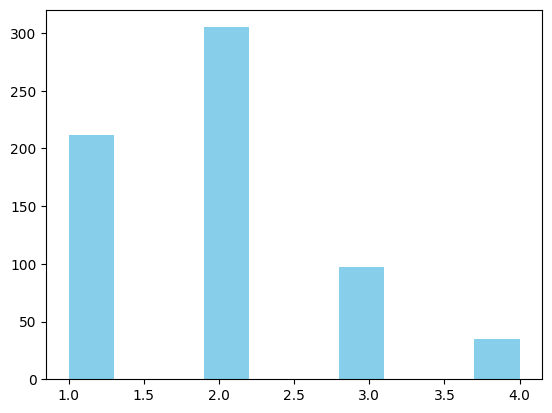

In [20]:
## plot the data to get clear understanding
plt.hist(df['studytime'], color= 'skyblue')


plt.show()

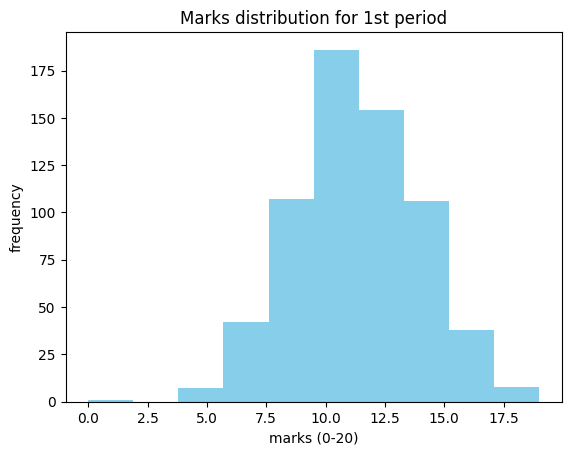

In [21]:
plt.hist(df['G1'], color= 'skyblue')  # G1 - first period grade: outof 20
plt.title('Marks distribution for 1st period')
plt.xlabel('marks (0-20)')
plt.ylabel('frequency')

plt.show()

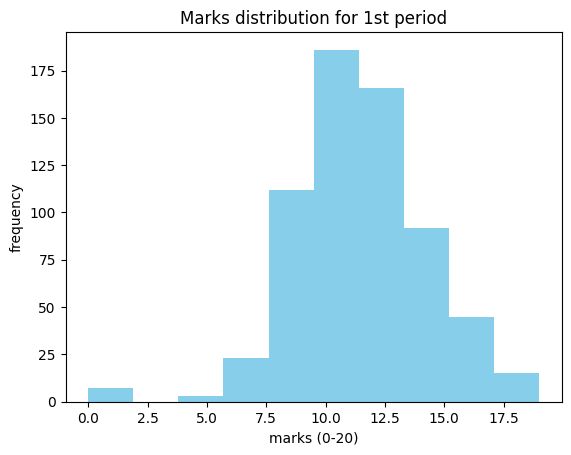

In [22]:
plt.hist(df['G2'], color= 'skyblue')    # G2 - 2nd period grades: outof 20
plt.title('Marks distribution for 1st period')
plt.xlabel('marks (0-20)')
plt.ylabel('frequency')

plt.show()

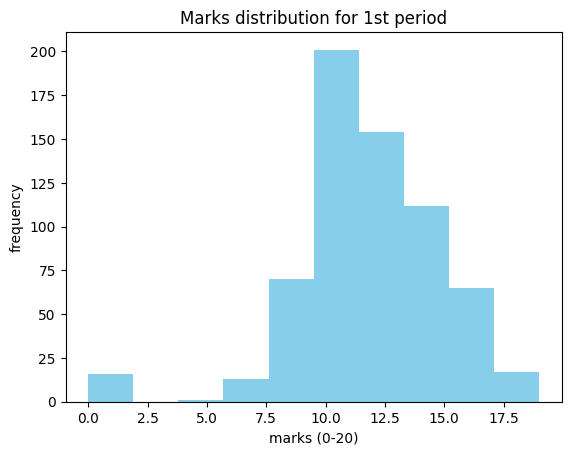

In [23]:
plt.hist(df['G3'], color= 'skyblue')  # G3 - last period grade: outof 20
plt.title('Marks distribution for 1st period')
plt.xlabel('marks (0-20)')
plt.ylabel('frequency')

plt.show()

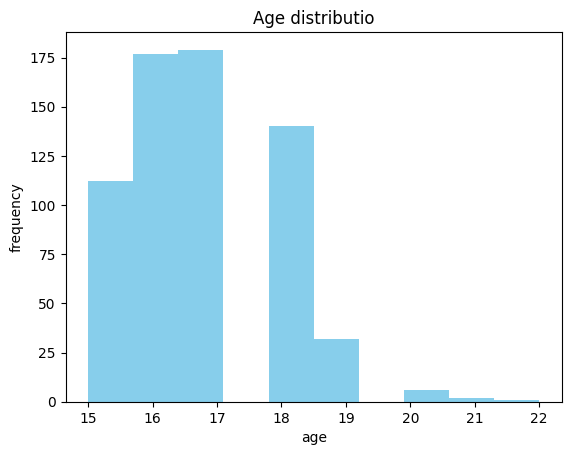

In [24]:
plt.hist(df['age'], color= 'skyblue') 
plt.title('Age distributio')
plt.xlabel('age')
plt.ylabel('frequency')

plt.show()

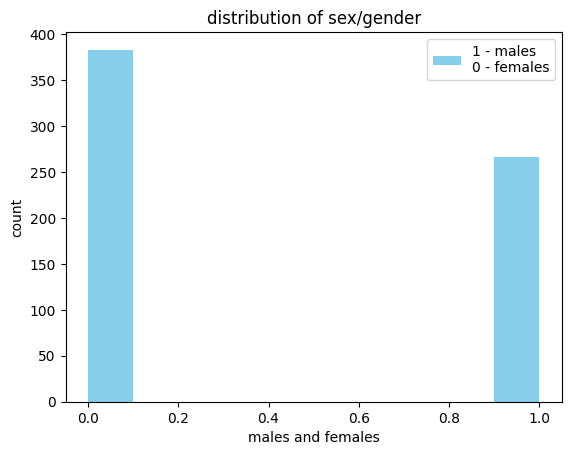

In [25]:
plt.hist(df['sex'], color= 'skyblue', label= '1 - males \n0 - females')
plt.title('distribution of sex/gender')
plt.xlabel('males and females')
plt.ylabel('count')

plt.legend()
plt.show()

In [26]:
#plt.scatter(df['age'], df['G1'], color= 'skyblue')
#plt.title('age vs grades')
#plt.xlabel('Age')
#plt.ylabel('Grades')

#plt.show()

#### Split data and Evaluate the model

In [27]:
## predict the attribute G3 (final)
pred = 'G3'             # what we want to achieve/ often called 'label'
X = np.array(df.drop([pred], axis= 1))
y = np.array(df[pred])

In [28]:
## train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size= 0.9)   # 90% on training and 10 on testing

In [29]:
## Lets create a model
l_model = linear_model.LinearRegression()

In [30]:
## accuracy
l_model.fit(X_train, y_train)
accuracy = l_model.score(X_test, y_test)

print(accuracy)

0.865992255731411


In [31]:
## find parameters/ constants
print('coefficient: \n', l_model.coef_)
print('intercept: \n', l_model.intercept_)

coefficient: 
 [ 0.13196376  0.89178675  0.0677213  -0.26942086  0.02391865  0.00295779
 -0.16774146]
intercept: 
 -0.06806673919615669


### Testing

In [32]:
## test and compare
"""predictions = l_model.predict(X_test)

for x in range(len(predictions)):
    print(predictions[X], X_test[X], y_test[X])"""

'predictions = l_model.predict(X_test)\n\nfor x in range(len(predictions)):\n    print(predictions[X], X_test[X], y_test[X])'

#### SAVE THE MODEL OR TRAIN MULTIPLES AND SAVE BEST ONE

In [33]:
with open('studentmodel.pickle', 'wb') as f:
    pickle.dump(l_model, f)
    
pickle_in = open('studentmodel.pickle', 'rb')
l_model = pickle.load(pickle_in)

In [36]:
## plot and compare
""" 
p = 'G1'
style.use('ggplot')
plt.scatter(p, df['G3'])
plt.xlabel('G1')


plt.show() 

"""

" \np = 'G1'\nstyle.use('ggplot')\nplt.scatter(p, df['G3'])\nplt.xlabel('G1')\n\n\nplt.show() \n\n"